In [1]:
import pandas as pd
import warnings
import os
import cnn_loop

from processing import preprocessing

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
data_df = preprocessing.load_dataset(num_samples=500)

0.00 of data loaded


In [3]:
data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')
data_df = preprocessing.filter_mfccs(data_df)

In [4]:
X_train, X_test, y_train, y_test = preprocessing.create_training_data(data_df)

In [5]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 40, 173, 1)
X_test shape: (1466, 40, 173, 1)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [6]:
model = cnn_loop.CNN(num_outputs, num_models=4, DP_rate=1.0)

In [7]:
model.build_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f18d8006240>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f18d7ff0748>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f18d806db70>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f18d806c5c0>}

In [8]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 172, 16)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 86, 16)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 3ms/step - loss: 10.7319 - accuracy: 0.1248
Pre-training accuracy: 12.4829%

 SUMMARY FOR MODEL  2
Model: "sequential_1"
_________________________________________________________________
Lay

In [9]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=256)

Training for model  1  has started.
Epoch 1/500
23/23 [==============================] - ETA: 0s - loss: 7.7919 - accuracy: 0.1259
Epoch 00001: val_loss improved from inf to 5.22198, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 7.7919 - accuracy: 0.1259 - val_loss: 5.2220 - val_accuracy: 0.1132
Epoch 2/500
18/23 [======================>.......] - ETA: 0s - loss: 4.3604 - accuracy: 0.1252
Epoch 00002: val_loss improved from 5.22198 to 3.48068, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 4.2030 - accuracy: 0.1218 - val_loss: 3.4807 - val_accuracy: 0.1201
Epoch 3/500
20/23 [=========================>....] - ETA: 0s - loss: 3.1025 - accuracy: 0.1109
Epoch 00003: val_loss improved from 3.48068 to 2.72698, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 12ms/step - loss: 3.0595 - accu

Epoch 25/500
19/23 [=======================>......] - ETA: 0s - loss: 1.7885 - accuracy: 0.3417
Epoch 00025: val_loss improved from 1.83959 to 1.83058, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.7871 - accuracy: 0.3419 - val_loss: 1.8306 - val_accuracy: 0.2988
Epoch 26/500
18/23 [======================>.......] - ETA: 0s - loss: 1.7698 - accuracy: 0.3451
Epoch 00026: val_loss improved from 1.83058 to 1.82465, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.7813 - accuracy: 0.3450 - val_loss: 1.8246 - val_accuracy: 0.3090
Epoch 27/500
19/23 [=======================>......] - ETA: 0s - loss: 1.7723 - accuracy: 0.3491
Epoch 00027: val_loss improved from 1.82465 to 1.81955, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.7757 - accuracy: 0.3487 - val_loss: 1.81

Epoch 50/500
19/23 [=======================>......] - ETA: 0s - loss: 1.7157 - accuracy: 0.3577
Epoch 00050: val_loss improved from 1.76361 to 1.76039, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.7163 - accuracy: 0.3622 - val_loss: 1.7604 - val_accuracy: 0.3363
Epoch 51/500
19/23 [=======================>......] - ETA: 0s - loss: 1.7119 - accuracy: 0.3674
Epoch 00051: val_loss did not improve from 1.76039
23/23 [==============================] - 0s 12ms/step - loss: 1.7149 - accuracy: 0.3692 - val_loss: 1.7649 - val_accuracy: 0.3424
Epoch 52/500
19/23 [=======================>......] - ETA: 0s - loss: 1.7091 - accuracy: 0.3723
Epoch 00052: val_loss improved from 1.76039 to 1.75897, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.7164 - accuracy: 0.3692 - val_loss: 1.7590 - val_accuracy: 0.3431
Epoch 53/500
19/23 [===================

Epoch 77/500
20/23 [=========================>....] - ETA: 0s - loss: 1.6840 - accuracy: 0.3904
Epoch 00077: val_loss did not improve from 1.72778
23/23 [==============================] - 0s 13ms/step - loss: 1.6817 - accuracy: 0.3916 - val_loss: 1.7295 - val_accuracy: 0.3554
Epoch 78/500
19/23 [=======================>......] - ETA: 0s - loss: 1.6819 - accuracy: 0.3877
Epoch 00078: val_loss did not improve from 1.72778
23/23 [==============================] - 0s 12ms/step - loss: 1.6816 - accuracy: 0.3904 - val_loss: 1.7292 - val_accuracy: 0.3690
Epoch 79/500
18/23 [======================>.......] - ETA: 0s - loss: 1.6835 - accuracy: 0.3915
Epoch 00079: val_loss improved from 1.72778 to 1.72649, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.6818 - accuracy: 0.3892 - val_loss: 1.7265 - val_accuracy: 0.3554
Epoch 80/500
19/23 [=======================>......] - ETA: 0s - loss: 1.6782 - accuracy: 0.3836
Epoch 00

19/23 [=======================>......] - ETA: 0s - loss: 1.6443 - accuracy: 0.4073
Epoch 00103: val_loss did not improve from 1.69046
23/23 [==============================] - 0s 11ms/step - loss: 1.6482 - accuracy: 0.4051 - val_loss: 1.6911 - val_accuracy: 0.3868
Epoch 104/500
19/23 [=======================>......] - ETA: 0s - loss: 1.6491 - accuracy: 0.4046
Epoch 00104: val_loss improved from 1.69046 to 1.68857, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 12ms/step - loss: 1.6450 - accuracy: 0.4062 - val_loss: 1.6886 - val_accuracy: 0.3738
Epoch 105/500
19/23 [=======================>......] - ETA: 0s - loss: 1.6456 - accuracy: 0.4019
Epoch 00105: val_loss improved from 1.68857 to 1.68652, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.6425 - accuracy: 0.4090 - val_loss: 1.6865 - val_accuracy: 0.3806
Epoch 106/500
18/23 [======================>......

19/23 [=======================>......] - ETA: 0s - loss: 1.6006 - accuracy: 0.4262
Epoch 00129: val_loss improved from 1.65814 to 1.65568, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.6065 - accuracy: 0.4264 - val_loss: 1.6557 - val_accuracy: 0.3950
Epoch 130/500
18/23 [======================>.......] - ETA: 0s - loss: 1.5912 - accuracy: 0.4403
Epoch 00130: val_loss did not improve from 1.65568
23/23 [==============================] - 0s 12ms/step - loss: 1.6048 - accuracy: 0.4335 - val_loss: 1.6608 - val_accuracy: 0.3881
Epoch 131/500
19/23 [=======================>......] - ETA: 0s - loss: 1.6050 - accuracy: 0.4293
Epoch 00131: val_loss improved from 1.65568 to 1.65368, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 12ms/step - loss: 1.6044 - accuracy: 0.4306 - val_loss: 1.6537 - val_accuracy: 0.3997
Epoch 132/500
19/23 [=======================>.....

Epoch 156/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5664 - accuracy: 0.4463
Epoch 00156: val_loss did not improve from 1.62909
23/23 [==============================] - 0s 12ms/step - loss: 1.5686 - accuracy: 0.4467 - val_loss: 1.6318 - val_accuracy: 0.4004
Epoch 157/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5651 - accuracy: 0.4562
Epoch 00157: val_loss improved from 1.62909 to 1.62095, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.5681 - accuracy: 0.4494 - val_loss: 1.6209 - val_accuracy: 0.4086
Epoch 158/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5757 - accuracy: 0.4482
Epoch 00158: val_loss improved from 1.62095 to 1.61669, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.5642 - accuracy: 0.4513 - val_loss: 1.6167 - val_accuracy: 0.4127
Epoch 159/500
19/23 [===============

Epoch 183/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5260 - accuracy: 0.4568
Epoch 00183: val_loss improved from 1.59338 to 1.59040, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 12ms/step - loss: 1.5344 - accuracy: 0.4573 - val_loss: 1.5904 - val_accuracy: 0.4161
Epoch 184/500
18/23 [======================>.......] - ETA: 0s - loss: 1.5448 - accuracy: 0.4510
Epoch 00184: val_loss did not improve from 1.59040
23/23 [==============================] - 0s 12ms/step - loss: 1.5331 - accuracy: 0.4567 - val_loss: 1.5972 - val_accuracy: 0.4113
Epoch 185/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5373 - accuracy: 0.4500
Epoch 00185: val_loss did not improve from 1.59040
23/23 [==============================] - 0s 12ms/step - loss: 1.5325 - accuracy: 0.4564 - val_loss: 1.5969 - val_accuracy: 0.4072
Epoch 186/500
23/23 [==============================] - ETA: 0s - loss: 1.5301 - accuracy: 0.4600
Epoc

Epoch 211/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5096 - accuracy: 0.4650
Epoch 00211: val_loss did not improve from 1.56863
23/23 [==============================] - 0s 12ms/step - loss: 1.5063 - accuracy: 0.4690 - val_loss: 1.5750 - val_accuracy: 0.4175
Epoch 212/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5049 - accuracy: 0.4700
Epoch 00212: val_loss did not improve from 1.56863
23/23 [==============================] - 0s 11ms/step - loss: 1.5092 - accuracy: 0.4661 - val_loss: 1.5776 - val_accuracy: 0.4188
Epoch 213/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4997 - accuracy: 0.4720
Epoch 00213: val_loss did not improve from 1.56863
23/23 [==============================] - 0s 11ms/step - loss: 1.5055 - accuracy: 0.4677 - val_loss: 1.5695 - val_accuracy: 0.4202
Epoch 214/500
19/23 [=======================>......] - ETA: 0s - loss: 1.5055 - accuracy: 0.4673
Epoch 00214: val_loss improved from 1.56863 to 1.56720, saving model 

Epoch 238/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4792 - accuracy: 0.4866
Epoch 00238: val_loss improved from 1.55274 to 1.54905, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.4851 - accuracy: 0.4834 - val_loss: 1.5490 - val_accuracy: 0.4277
Epoch 239/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4726 - accuracy: 0.4778
Epoch 00239: val_loss improved from 1.54905 to 1.54718, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.4820 - accuracy: 0.4762 - val_loss: 1.5472 - val_accuracy: 0.4297
Epoch 240/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4901 - accuracy: 0.4813
Epoch 00240: val_loss did not improve from 1.54718
23/23 [==============================] - 0s 12ms/step - loss: 1.4840 - accuracy: 0.4832 - val_loss: 1.5538 - val_accuracy: 0.4359
Epoch 241/500
19/23 [===============

Epoch 266/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4634 - accuracy: 0.4918
Epoch 00266: val_loss did not improve from 1.53203
23/23 [==============================] - 0s 12ms/step - loss: 1.4654 - accuracy: 0.4898 - val_loss: 1.5331 - val_accuracy: 0.4379
Epoch 267/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4649 - accuracy: 0.4910
Epoch 00267: val_loss did not improve from 1.53203
23/23 [==============================] - 0s 12ms/step - loss: 1.4695 - accuracy: 0.4910 - val_loss: 1.5366 - val_accuracy: 0.4434
Epoch 268/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4676 - accuracy: 0.4821
Epoch 00268: val_loss improved from 1.53203 to 1.53125, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.4662 - accuracy: 0.4803 - val_loss: 1.5312 - val_accuracy: 0.4434
Epoch 269/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4636 - accuracy: 0.4877
Epoc

Epoch 294/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4445 - accuracy: 0.5056
Epoch 00294: val_loss did not improve from 1.51758
23/23 [==============================] - 0s 11ms/step - loss: 1.4507 - accuracy: 0.5006 - val_loss: 1.5187 - val_accuracy: 0.4509
Epoch 295/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4485 - accuracy: 0.4947
Epoch 00295: val_loss did not improve from 1.51758
23/23 [==============================] - 0s 12ms/step - loss: 1.4496 - accuracy: 0.4921 - val_loss: 1.5183 - val_accuracy: 0.4604
Epoch 296/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4525 - accuracy: 0.4928
Epoch 00296: val_loss improved from 1.51758 to 1.51426, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 13ms/step - loss: 1.4482 - accuracy: 0.4953 - val_loss: 1.5143 - val_accuracy: 0.4529
Epoch 297/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4431 - accuracy: 0.4971
Epoc

Epoch 321/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4430 - accuracy: 0.5012
Epoch 00321: val_loss did not improve from 1.50305
23/23 [==============================] - 0s 12ms/step - loss: 1.4388 - accuracy: 0.5028 - val_loss: 1.5042 - val_accuracy: 0.4523
Epoch 322/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4335 - accuracy: 0.5031
Epoch 00322: val_loss did not improve from 1.50305
23/23 [==============================] - 0s 12ms/step - loss: 1.4360 - accuracy: 0.5061 - val_loss: 1.5120 - val_accuracy: 0.4550
Epoch 323/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4391 - accuracy: 0.5002
Epoch 00323: val_loss improved from 1.50305 to 1.50187, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 12ms/step - loss: 1.4372 - accuracy: 0.5011 - val_loss: 1.5019 - val_accuracy: 0.4495
Epoch 324/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4358 - accuracy: 0.5023
Epoc

Epoch 349/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4139 - accuracy: 0.5090
Epoch 00349: val_loss did not improve from 1.48984
23/23 [==============================] - 0s 12ms/step - loss: 1.4216 - accuracy: 0.5088 - val_loss: 1.4960 - val_accuracy: 0.4666
Epoch 350/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4255 - accuracy: 0.5051
Epoch 00350: val_loss did not improve from 1.48984
23/23 [==============================] - 0s 12ms/step - loss: 1.4278 - accuracy: 0.5038 - val_loss: 1.4922 - val_accuracy: 0.4618
Epoch 351/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4222 - accuracy: 0.5082
Epoch 00351: val_loss did not improve from 1.48984
23/23 [==============================] - 0s 12ms/step - loss: 1.4250 - accuracy: 0.5045 - val_loss: 1.4955 - val_accuracy: 0.4509
Epoch 352/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4195 - accuracy: 0.5041
Epoch 00352: val_loss did not improve from 1.48984
23/23 [===========

Epoch 9/500
23/23 [==============================] - ETA: 0s - loss: 1.4195 - accuracy: 0.5170
Epoch 00009: val_loss improved from 1.48321 to 1.46000, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 1.4195 - accuracy: 0.5170 - val_loss: 1.4600 - val_accuracy: 0.5027
Epoch 10/500
19/23 [=======================>......] - ETA: 0s - loss: 1.4030 - accuracy: 0.5160
Epoch 00010: val_loss improved from 1.46000 to 1.44447, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 1.4006 - accuracy: 0.5206 - val_loss: 1.4445 - val_accuracy: 0.4918
Epoch 11/500
20/23 [=========================>....] - ETA: 0s - loss: 1.3792 - accuracy: 0.5266
Epoch 00011: val_loss improved from 1.44447 to 1.42946, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 1.3856 - accuracy: 0.5245 - val_loss: 1.429

Epoch 34/500
21/23 [==========================>...] - ETA: 0s - loss: 1.1203 - accuracy: 0.6127
Epoch 00034: val_loss improved from 1.16717 to 1.16586, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 15ms/step - loss: 1.1185 - accuracy: 0.6158 - val_loss: 1.1659 - val_accuracy: 0.6050
Epoch 35/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1085 - accuracy: 0.6165
Epoch 00035: val_loss improved from 1.16586 to 1.14991, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 1.1105 - accuracy: 0.6168 - val_loss: 1.1499 - val_accuracy: 0.5989
Epoch 36/500
20/23 [=========================>....] - ETA: 0s - loss: 1.1068 - accuracy: 0.6234
Epoch 00036: val_loss improved from 1.14991 to 1.13938, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 1.1020 - accuracy: 0.6262 - val_loss: 1.13

Epoch 60/500
20/23 [=========================>....] - ETA: 0s - loss: 0.9835 - accuracy: 0.6736
Epoch 00060: val_loss improved from 1.03531 to 1.02470, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.9852 - accuracy: 0.6722 - val_loss: 1.0247 - val_accuracy: 0.6548
Epoch 61/500
23/23 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.6775
Epoch 00061: val_loss improved from 1.02470 to 1.01982, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.9781 - accuracy: 0.6775 - val_loss: 1.0198 - val_accuracy: 0.6535
Epoch 62/500
19/23 [=======================>......] - ETA: 0s - loss: 0.9802 - accuracy: 0.6711
Epoch 00062: val_loss did not improve from 1.01982
23/23 [==============================] - 0s 15ms/step - loss: 0.9734 - accuracy: 0.6755 - val_loss: 1.0368 - val_accuracy: 0.6480
Epoch 63/500
21/23 [===================

Epoch 87/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8901 - accuracy: 0.7087
Epoch 00087: val_loss did not improve from 0.94664
23/23 [==============================] - 0s 14ms/step - loss: 0.8945 - accuracy: 0.7070 - val_loss: 0.9524 - val_accuracy: 0.6760
Epoch 88/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8895 - accuracy: 0.7093
Epoch 00088: val_loss did not improve from 0.94664
23/23 [==============================] - 0s 15ms/step - loss: 0.8909 - accuracy: 0.7076 - val_loss: 0.9483 - val_accuracy: 0.6930
Epoch 89/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8974 - accuracy: 0.7024
Epoch 00089: val_loss improved from 0.94664 to 0.94189, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.8944 - accuracy: 0.7030 - val_loss: 0.9419 - val_accuracy: 0.6937
Epoch 90/500
19/23 [=======================>......] - ETA: 0s - loss: 0.9092 - accuracy: 0.6974
Epoch 00

Epoch 114/500
20/23 [=========================>....] - ETA: 0s - loss: 0.8502 - accuracy: 0.7184
Epoch 00114: val_loss improved from 0.90203 to 0.88628, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.8467 - accuracy: 0.7176 - val_loss: 0.8863 - val_accuracy: 0.7087
Epoch 115/500
19/23 [=======================>......] - ETA: 0s - loss: 0.8516 - accuracy: 0.7227
Epoch 00115: val_loss did not improve from 0.88628
23/23 [==============================] - 0s 15ms/step - loss: 0.8461 - accuracy: 0.7222 - val_loss: 0.9123 - val_accuracy: 0.7074
Epoch 116/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8485 - accuracy: 0.7210
Epoch 00116: val_loss did not improve from 0.88628
23/23 [==============================] - 0s 14ms/step - loss: 0.8552 - accuracy: 0.7161 - val_loss: 0.9002 - val_accuracy: 0.7005
Epoch 117/500
21/23 [==========================>...] - ETA: 0s - loss: 0.8472 - accuracy: 0.7202
Epoc

23/23 [==============================] - ETA: 0s - loss: 0.8020 - accuracy: 0.7338
Epoch 00142: val_loss did not improve from 0.85136
23/23 [==============================] - 0s 14ms/step - loss: 0.8020 - accuracy: 0.7338 - val_loss: 0.8590 - val_accuracy: 0.7149
Epoch 143/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7949 - accuracy: 0.7407
Epoch 00143: val_loss improved from 0.85136 to 0.84724, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.8009 - accuracy: 0.7398 - val_loss: 0.8472 - val_accuracy: 0.7196
Epoch 144/500
23/23 [==============================] - ETA: 0s - loss: 0.8025 - accuracy: 0.7309
Epoch 00144: val_loss improved from 0.84724 to 0.84425, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.8025 - accuracy: 0.7309 - val_loss: 0.8442 - val_accuracy: 0.7149
Epoch 145/500
22/23 [===========================>.

Epoch 170/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7609 - accuracy: 0.7502
Epoch 00170: val_loss did not improve from 0.81768
23/23 [==============================] - 0s 14ms/step - loss: 0.7682 - accuracy: 0.7458 - val_loss: 0.8196 - val_accuracy: 0.7299
Epoch 171/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7736 - accuracy: 0.7431
Epoch 00171: val_loss did not improve from 0.81768
23/23 [==============================] - 0s 13ms/step - loss: 0.7710 - accuracy: 0.7446 - val_loss: 0.8207 - val_accuracy: 0.7278
Epoch 172/500
23/23 [==============================] - ETA: 0s - loss: 0.7726 - accuracy: 0.7473
Epoch 00172: val_loss did not improve from 0.81768
23/23 [==============================] - 0s 15ms/step - loss: 0.7726 - accuracy: 0.7473 - val_loss: 0.8243 - val_accuracy: 0.7237
Epoch 173/500
20/23 [=========================>....] - ETA: 0s - loss: 0.7856 - accuracy: 0.7342
Epoch 00173: val_loss did not improve from 0.81768
23/23 [===========

Epoch 198/500
23/23 [==============================] - ETA: 0s - loss: 0.7478 - accuracy: 0.7521
Epoch 00198: val_loss did not improve from 0.79178
23/23 [==============================] - 0s 15ms/step - loss: 0.7478 - accuracy: 0.7521 - val_loss: 0.8070 - val_accuracy: 0.7306
Epoch 199/500
19/23 [=======================>......] - ETA: 0s - loss: 0.7457 - accuracy: 0.7514
Epoch 00199: val_loss did not improve from 0.79178
23/23 [==============================] - 0s 15ms/step - loss: 0.7421 - accuracy: 0.7517 - val_loss: 0.8006 - val_accuracy: 0.7278
Epoch 200/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7405 - accuracy: 0.7553
Epoch 00200: val_loss did not improve from 0.79178
23/23 [==============================] - 0s 16ms/step - loss: 0.7449 - accuracy: 0.7536 - val_loss: 0.7936 - val_accuracy: 0.7360
Epoch 201/500
23/23 [==============================] - ETA: 0s - loss: 0.7378 - accuracy: 0.7517
Epoch 00201: val_loss improved from 0.79178 to 0.78844, saving model 

23/23 [==============================] - ETA: 0s - loss: 0.7260 - accuracy: 0.7557
Epoch 00226: val_loss did not improve from 0.76830
23/23 [==============================] - 0s 15ms/step - loss: 0.7260 - accuracy: 0.7557 - val_loss: 0.8238 - val_accuracy: 0.7156
Epoch 227/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7425 - accuracy: 0.7483
Epoch 00227: val_loss did not improve from 0.76830
23/23 [==============================] - 0s 16ms/step - loss: 0.7385 - accuracy: 0.7497 - val_loss: 0.7919 - val_accuracy: 0.7347
Epoch 228/500
19/23 [=======================>......] - ETA: 0s - loss: 0.7252 - accuracy: 0.7488
Epoch 00228: val_loss did not improve from 0.76830
23/23 [==============================] - 0s 14ms/step - loss: 0.7298 - accuracy: 0.7509 - val_loss: 0.7697 - val_accuracy: 0.7394
Epoch 229/500
23/23 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.7593
Epoch 00229: val_loss improved from 0.76830 to 0.76770, saving model to models/save

Epoch 255/500
19/23 [=======================>......] - ETA: 0s - loss: 0.7052 - accuracy: 0.7627
Epoch 00255: val_loss improved from 0.74749 to 0.74327, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.7109 - accuracy: 0.7605 - val_loss: 0.7433 - val_accuracy: 0.7544
Epoch 256/500
21/23 [==========================>...] - ETA: 0s - loss: 0.7035 - accuracy: 0.7621
Epoch 00256: val_loss did not improve from 0.74327
23/23 [==============================] - 0s 15ms/step - loss: 0.7041 - accuracy: 0.7613 - val_loss: 0.7512 - val_accuracy: 0.7462
Epoch 257/500
23/23 [==============================] - ETA: 0s - loss: 0.6982 - accuracy: 0.7666
Epoch 00257: val_loss improved from 0.74327 to 0.74252, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.6982 - accuracy: 0.7666 - val_loss: 0.7425 - val_accuracy: 0.7435
Epoch 258/500
19/23 [===============

19/23 [=======================>......] - ETA: 0s - loss: 0.6834 - accuracy: 0.7708
Epoch 00283: val_loss did not improve from 0.72824
23/23 [==============================] - 0s 14ms/step - loss: 0.6838 - accuracy: 0.7715 - val_loss: 0.7370 - val_accuracy: 0.7462
Epoch 284/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6857 - accuracy: 0.7730
Epoch 00284: val_loss did not improve from 0.72824
23/23 [==============================] - 0s 15ms/step - loss: 0.6860 - accuracy: 0.7722 - val_loss: 0.7453 - val_accuracy: 0.7415
Epoch 285/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6839 - accuracy: 0.7725
Epoch 00285: val_loss did not improve from 0.72824
23/23 [==============================] - 0s 14ms/step - loss: 0.6893 - accuracy: 0.7697 - val_loss: 0.7377 - val_accuracy: 0.7469
Epoch 286/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6757 - accuracy: 0.7707
Epoch 00286: val_loss did not improve from 0.72824
23/23 [=========================

23/23 [==============================] - ETA: 0s - loss: 0.6582 - accuracy: 0.7806
Epoch 00311: val_loss did not improve from 0.71204
23/23 [==============================] - 0s 15ms/step - loss: 0.6582 - accuracy: 0.7806 - val_loss: 0.7239 - val_accuracy: 0.7531
Epoch 312/500
23/23 [==============================] - ETA: 0s - loss: 0.6662 - accuracy: 0.7734
Epoch 00312: val_loss did not improve from 0.71204
23/23 [==============================] - 0s 15ms/step - loss: 0.6662 - accuracy: 0.7734 - val_loss: 0.7163 - val_accuracy: 0.7606
Epoch 313/500
23/23 [==============================] - ETA: 0s - loss: 0.6661 - accuracy: 0.7760
Epoch 00313: val_loss did not improve from 0.71204
23/23 [==============================] - 0s 15ms/step - loss: 0.6661 - accuracy: 0.7760 - val_loss: 0.7205 - val_accuracy: 0.7558
Epoch 314/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6688 - accuracy: 0.7731
Epoch 00314: val_loss did not improve from 0.71204
23/23 [=========================

Epoch 340/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6559 - accuracy: 0.7770
Epoch 00340: val_loss did not improve from 0.69650
23/23 [==============================] - 0s 14ms/step - loss: 0.6541 - accuracy: 0.7801 - val_loss: 0.7086 - val_accuracy: 0.7558
Epoch 341/500
19/23 [=======================>......] - ETA: 0s - loss: 0.6401 - accuracy: 0.7913
Epoch 00341: val_loss did not improve from 0.69650
23/23 [==============================] - 0s 14ms/step - loss: 0.6494 - accuracy: 0.7862 - val_loss: 0.7121 - val_accuracy: 0.7640
Epoch 342/500
19/23 [=======================>......] - ETA: 0s - loss: 0.6507 - accuracy: 0.7819
Epoch 00342: val_loss improved from 0.69650 to 0.69241, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.6551 - accuracy: 0.7814 - val_loss: 0.6924 - val_accuracy: 0.7688
Epoch 343/500
23/23 [==============================] - ETA: 0s - loss: 0.6439 - accuracy: 0.7831
Epoc

19/23 [=======================>......] - ETA: 0s - loss: 0.6576 - accuracy: 0.7773
Epoch 00369: val_loss did not improve from 0.68722
23/23 [==============================] - 0s 15ms/step - loss: 0.6557 - accuracy: 0.7751 - val_loss: 0.7145 - val_accuracy: 0.7606
Epoch 370/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6470 - accuracy: 0.7883
Epoch 00370: val_loss improved from 0.68722 to 0.67762, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.6503 - accuracy: 0.7855 - val_loss: 0.6776 - val_accuracy: 0.7735
Epoch 371/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6337 - accuracy: 0.7898
Epoch 00371: val_loss did not improve from 0.67762
23/23 [==============================] - 0s 13ms/step - loss: 0.6351 - accuracy: 0.7884 - val_loss: 0.7162 - val_accuracy: 0.7667
Epoch 372/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6450 - accuracy: 0.7861
Epoch 00372: val_l

Epoch 398/500
19/23 [=======================>......] - ETA: 0s - loss: 0.6222 - accuracy: 0.7909
Epoch 00398: val_loss did not improve from 0.67621
23/23 [==============================] - 0s 15ms/step - loss: 0.6263 - accuracy: 0.7860 - val_loss: 0.6900 - val_accuracy: 0.7694
Epoch 399/500
19/23 [=======================>......] - ETA: 0s - loss: 0.6186 - accuracy: 0.7917
Epoch 00399: val_loss improved from 0.67621 to 0.67424, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.6203 - accuracy: 0.7913 - val_loss: 0.6742 - val_accuracy: 0.7756
Epoch 400/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6189 - accuracy: 0.7950
Epoch 00400: val_loss improved from 0.67424 to 0.67202, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 16ms/step - loss: 0.6172 - accuracy: 0.7954 - val_loss: 0.6720 - val_accuracy: 0.7831
Epoch 401/500
20/23 [===============

21/23 [==========================>...] - ETA: 0s - loss: 0.6125 - accuracy: 0.8021
Epoch 00426: val_loss did not improve from 0.66172
23/23 [==============================] - 0s 14ms/step - loss: 0.6061 - accuracy: 0.8033 - val_loss: 0.6755 - val_accuracy: 0.7838
Epoch 427/500
23/23 [==============================] - ETA: 0s - loss: 0.6228 - accuracy: 0.7922
Epoch 00427: val_loss did not improve from 0.66172
23/23 [==============================] - 0s 15ms/step - loss: 0.6228 - accuracy: 0.7922 - val_loss: 0.6679 - val_accuracy: 0.7742
Epoch 428/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6081 - accuracy: 0.7985
Epoch 00428: val_loss did not improve from 0.66172
23/23 [==============================] - 0s 15ms/step - loss: 0.6090 - accuracy: 0.7987 - val_loss: 0.6643 - val_accuracy: 0.7810
Epoch 429/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6010 - accuracy: 0.8022
Epoch 00429: val_loss did not improve from 0.66172
23/23 [=========================

21/23 [==========================>...] - ETA: 0s - loss: 0.6095 - accuracy: 0.8004
Epoch 00455: val_loss did not improve from 0.65772
23/23 [==============================] - 0s 15ms/step - loss: 0.6077 - accuracy: 0.8002 - val_loss: 0.6836 - val_accuracy: 0.7667
Epoch 456/500
19/23 [=======================>......] - ETA: 0s - loss: 0.6072 - accuracy: 0.7954
Epoch 00456: val_loss did not improve from 0.65772
23/23 [==============================] - 0s 14ms/step - loss: 0.6031 - accuracy: 0.7970 - val_loss: 0.6683 - val_accuracy: 0.7729
Epoch 457/500
23/23 [==============================] - ETA: 0s - loss: 0.6133 - accuracy: 0.7944
Epoch 00457: val_loss did not improve from 0.65772
23/23 [==============================] - 0s 15ms/step - loss: 0.6133 - accuracy: 0.7944 - val_loss: 0.6939 - val_accuracy: 0.7688
Epoch 458/500
20/23 [=========================>....] - ETA: 0s - loss: 0.6132 - accuracy: 0.7947
Epoch 00458: val_loss improved from 0.65772 to 0.65299, saving model to models/save

Epoch 484/500
19/23 [=======================>......] - ETA: 0s - loss: 0.5804 - accuracy: 0.8067
Epoch 00484: val_loss did not improve from 0.64558
23/23 [==============================] - 0s 14ms/step - loss: 0.5821 - accuracy: 0.8060 - val_loss: 0.6867 - val_accuracy: 0.7742
Epoch 485/500
19/23 [=======================>......] - ETA: 0s - loss: 0.5777 - accuracy: 0.8082
Epoch 00485: val_loss did not improve from 0.64558
23/23 [==============================] - 0s 14ms/step - loss: 0.5875 - accuracy: 0.8058 - val_loss: 0.6699 - val_accuracy: 0.7817
Epoch 486/500
19/23 [=======================>......] - ETA: 0s - loss: 0.5682 - accuracy: 0.8119
Epoch 00486: val_loss did not improve from 0.64558
23/23 [==============================] - 0s 15ms/step - loss: 0.5819 - accuracy: 0.8116 - val_loss: 0.6525 - val_accuracy: 0.7947
Epoch 487/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5880 - accuracy: 0.8071
Epoch 00487: val_loss did not improve from 0.64558
23/23 [===========

Epoch 11/500
22/23 [===========================>..] - ETA: 0s - loss: 1.0155 - accuracy: 0.6467
Epoch 00011: val_loss improved from 1.04661 to 1.01114, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 1.0142 - accuracy: 0.6451 - val_loss: 1.0111 - val_accuracy: 0.6371
Epoch 12/500
22/23 [===========================>..] - ETA: 0s - loss: 0.9878 - accuracy: 0.6596
Epoch 00012: val_loss improved from 1.01114 to 0.97752, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.9880 - accuracy: 0.6591 - val_loss: 0.9775 - val_accuracy: 0.6521
Epoch 13/500
23/23 [==============================] - ETA: 0s - loss: 0.9531 - accuracy: 0.6704
Epoch 00013: val_loss improved from 0.97752 to 0.96790, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.9531 - accuracy: 0.6704 - val_loss: 0.96

Epoch 37/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6864 - accuracy: 0.7692
Epoch 00037: val_loss improved from 0.77580 to 0.75207, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.6864 - accuracy: 0.7695 - val_loss: 0.7521 - val_accuracy: 0.7524
Epoch 38/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6808 - accuracy: 0.7740
Epoch 00038: val_loss did not improve from 0.75207
23/23 [==============================] - 0s 16ms/step - loss: 0.6815 - accuracy: 0.7744 - val_loss: 0.7787 - val_accuracy: 0.7408
Epoch 39/500
21/23 [==========================>...] - ETA: 0s - loss: 0.6877 - accuracy: 0.7701
Epoch 00039: val_loss did not improve from 0.75207
23/23 [==============================] - 0s 16ms/step - loss: 0.6844 - accuracy: 0.7709 - val_loss: 0.7563 - val_accuracy: 0.7531
Epoch 40/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6675 - accuracy: 0.7756
Epoch 00

23/23 [==============================] - 0s 18ms/step - loss: 0.5403 - accuracy: 0.8251 - val_loss: 0.6412 - val_accuracy: 0.7933
Epoch 64/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5451 - accuracy: 0.8238
Epoch 00064: val_loss did not improve from 0.64125
23/23 [==============================] - 0s 15ms/step - loss: 0.5421 - accuracy: 0.8234 - val_loss: 0.6432 - val_accuracy: 0.7981
Epoch 65/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5444 - accuracy: 0.8261
Epoch 00065: val_loss did not improve from 0.64125
23/23 [==============================] - 0s 16ms/step - loss: 0.5498 - accuracy: 0.8243 - val_loss: 0.6502 - val_accuracy: 0.7885
Epoch 66/500
21/23 [==========================>...] - ETA: 0s - loss: 0.5431 - accuracy: 0.8201
Epoch 00066: val_loss improved from 0.64125 to 0.63508, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.5489 - accuracy: 0.8186 - val_loss: 0.63

21/23 [==========================>...] - ETA: 0s - loss: 0.4671 - accuracy: 0.8475
Epoch 00091: val_loss improved from 0.58212 to 0.57893, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.4636 - accuracy: 0.8475 - val_loss: 0.5789 - val_accuracy: 0.8199
Epoch 92/500
23/23 [==============================] - ETA: 0s - loss: 0.4519 - accuracy: 0.8531
Epoch 00092: val_loss did not improve from 0.57893
23/23 [==============================] - 0s 15ms/step - loss: 0.4519 - accuracy: 0.8531 - val_loss: 0.5986 - val_accuracy: 0.8056
Epoch 93/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4537 - accuracy: 0.8546
Epoch 00093: val_loss improved from 0.57893 to 0.57360, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.4547 - accuracy: 0.8548 - val_loss: 0.5736 - val_accuracy: 0.8138
Epoch 94/500
23/23 [==============================] 

Epoch 119/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3755 - accuracy: 0.8770
Epoch 00119: val_loss improved from 0.52557 to 0.51870, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.3733 - accuracy: 0.8782 - val_loss: 0.5187 - val_accuracy: 0.8226
Epoch 120/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3736 - accuracy: 0.8773
Epoch 00120: val_loss did not improve from 0.51870
23/23 [==============================] - 0s 16ms/step - loss: 0.3728 - accuracy: 0.8772 - val_loss: 0.5266 - val_accuracy: 0.8342
Epoch 121/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3731 - accuracy: 0.8795
Epoch 00121: val_loss improved from 0.51870 to 0.50895, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.3777 - accuracy: 0.8777 - val_loss: 0.5090 - val_accuracy: 0.8383
Epoch 122/500
22/23 [===============

Epoch 147/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3154 - accuracy: 0.8949
Epoch 00147: val_loss improved from 0.47603 to 0.46091, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.3200 - accuracy: 0.8932 - val_loss: 0.4609 - val_accuracy: 0.8568
Epoch 148/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3116 - accuracy: 0.8999
Epoch 00148: val_loss did not improve from 0.46091
23/23 [==============================] - 0s 16ms/step - loss: 0.3086 - accuracy: 0.9010 - val_loss: 0.4729 - val_accuracy: 0.8479
Epoch 149/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3085 - accuracy: 0.8996
Epoch 00149: val_loss did not improve from 0.46091
23/23 [==============================] - 0s 16ms/step - loss: 0.3103 - accuracy: 0.8992 - val_loss: 0.4785 - val_accuracy: 0.8445
Epoch 150/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3022 - accuracy: 0.9023
Epoc

Epoch 175/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2668 - accuracy: 0.9137
Epoch 00175: val_loss did not improve from 0.43429
23/23 [==============================] - 0s 16ms/step - loss: 0.2685 - accuracy: 0.9132 - val_loss: 0.4443 - val_accuracy: 0.8636
Epoch 176/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2686 - accuracy: 0.9133
Epoch 00176: val_loss did not improve from 0.43429
23/23 [==============================] - 0s 16ms/step - loss: 0.2698 - accuracy: 0.9128 - val_loss: 0.4726 - val_accuracy: 0.8554
Epoch 177/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2742 - accuracy: 0.9102
Epoch 00177: val_loss did not improve from 0.43429
23/23 [==============================] - 0s 16ms/step - loss: 0.2769 - accuracy: 0.9079 - val_loss: 0.4384 - val_accuracy: 0.8540
Epoch 178/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2756 - accuracy: 0.9055
Epoch 00178: val_loss did not improve from 0.43429
23/23 [===========

Epoch 204/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2343 - accuracy: 0.9202
Epoch 00204: val_loss did not improve from 0.41576
23/23 [==============================] - 0s 16ms/step - loss: 0.2333 - accuracy: 0.9205 - val_loss: 0.4242 - val_accuracy: 0.8643
Epoch 205/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2218 - accuracy: 0.9275
Epoch 00205: val_loss improved from 0.41576 to 0.41505, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.2243 - accuracy: 0.9275 - val_loss: 0.4150 - val_accuracy: 0.8718
Epoch 206/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2244 - accuracy: 0.9260
Epoch 00206: val_loss improved from 0.41505 to 0.40907, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 17ms/step - loss: 0.2267 - accuracy: 0.9242 - val_loss: 0.4091 - val_accuracy: 0.8731
Epoch 207/500
22/23 [===============

21/23 [==========================>...] - ETA: 0s - loss: 0.2061 - accuracy: 0.9301
Epoch 00233: val_loss improved from 0.40907 to 0.40374, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 18ms/step - loss: 0.2049 - accuracy: 0.9307 - val_loss: 0.4037 - val_accuracy: 0.8799
Epoch 234/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1970 - accuracy: 0.9364
Epoch 00234: val_loss did not improve from 0.40374
23/23 [==============================] - 0s 16ms/step - loss: 0.1968 - accuracy: 0.9369 - val_loss: 0.4114 - val_accuracy: 0.8799
Epoch 235/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1940 - accuracy: 0.9369
Epoch 00235: val_loss did not improve from 0.40374
23/23 [==============================] - 0s 15ms/step - loss: 0.2000 - accuracy: 0.9341 - val_loss: 0.4265 - val_accuracy: 0.8656
Epoch 236/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2060 - accuracy: 0.9325
Epoch 00236: val_l

21/23 [==========================>...] - ETA: 0s - loss: 0.1866 - accuracy: 0.9375
Epoch 00262: val_loss did not improve from 0.39885
23/23 [==============================] - 0s 16ms/step - loss: 0.1833 - accuracy: 0.9387 - val_loss: 0.4165 - val_accuracy: 0.8765
Epoch 263/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1764 - accuracy: 0.9450
Epoch 00263: val_loss did not improve from 0.39885
23/23 [==============================] - 0s 15ms/step - loss: 0.1754 - accuracy: 0.9449 - val_loss: 0.4230 - val_accuracy: 0.8752
Epoch 264/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1819 - accuracy: 0.9403
Epoch 00264: val_loss did not improve from 0.39885
23/23 [==============================] - 0s 16ms/step - loss: 0.1818 - accuracy: 0.9403 - val_loss: 0.4094 - val_accuracy: 0.8799
Epoch 265/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1836 - accuracy: 0.9395
Epoch 00265: val_loss did not improve from 0.39885
23/23 [=========================

Epoch 291/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1532 - accuracy: 0.9498
Epoch 00291: val_loss did not improve from 0.38660
23/23 [==============================] - 0s 15ms/step - loss: 0.1567 - accuracy: 0.9480 - val_loss: 0.4623 - val_accuracy: 0.8670
Epoch 292/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1602 - accuracy: 0.9467
Epoch 00292: val_loss did not improve from 0.38660
23/23 [==============================] - 0s 16ms/step - loss: 0.1616 - accuracy: 0.9459 - val_loss: 0.3867 - val_accuracy: 0.8929
Epoch 293/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1624 - accuracy: 0.9444
Epoch 00293: val_loss did not improve from 0.38660
23/23 [==============================] - 0s 16ms/step - loss: 0.1611 - accuracy: 0.9452 - val_loss: 0.3955 - val_accuracy: 0.8861
Epoch 294/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1634 - accuracy: 0.9474
Epoch 00294: val_loss did not improve from 0.38660
23/23 [===========

21/23 [==========================>...] - ETA: 0s - loss: 0.1343 - accuracy: 0.9518
Epoch 00320: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1328 - accuracy: 0.9529 - val_loss: 0.3945 - val_accuracy: 0.8936
Epoch 321/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1287 - accuracy: 0.9580
Epoch 00321: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1309 - accuracy: 0.9570 - val_loss: 0.3873 - val_accuracy: 0.8956
Epoch 322/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1353 - accuracy: 0.9574
Epoch 00322: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1361 - accuracy: 0.9573 - val_loss: 0.3986 - val_accuracy: 0.8874
Epoch 323/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1361 - accuracy: 0.9537
Epoch 00323: val_loss did not improve from 0.37998
23/23 [=========================

Epoch 350/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1195 - accuracy: 0.9587
Epoch 00350: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1203 - accuracy: 0.9587 - val_loss: 0.4017 - val_accuracy: 0.8874
Epoch 351/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1158 - accuracy: 0.9613
Epoch 00351: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1144 - accuracy: 0.9620 - val_loss: 0.3933 - val_accuracy: 0.8943
Epoch 352/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1107 - accuracy: 0.9641
Epoch 00352: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1129 - accuracy: 0.9638 - val_loss: 0.4036 - val_accuracy: 0.8922
Epoch 353/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1294 - accuracy: 0.9563
Epoch 00353: val_loss did not improve from 0.37998
23/23 [===========

Epoch 380/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1102 - accuracy: 0.9628
Epoch 00380: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1098 - accuracy: 0.9633 - val_loss: 0.4137 - val_accuracy: 0.8888
Epoch 381/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1033 - accuracy: 0.9654
Epoch 00381: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.1024 - accuracy: 0.9659 - val_loss: 0.4100 - val_accuracy: 0.8909
Epoch 382/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0983 - accuracy: 0.9680
Epoch 00382: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 15ms/step - loss: 0.0981 - accuracy: 0.9684 - val_loss: 0.4079 - val_accuracy: 0.8929
Epoch 383/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0976 - accuracy: 0.9674
Epoch 00383: val_loss did not improve from 0.37998
23/23 [===========

Epoch 410/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0874 - accuracy: 0.9714
Epoch 00410: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.0888 - accuracy: 0.9710 - val_loss: 0.4127 - val_accuracy: 0.8929
Epoch 411/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0865 - accuracy: 0.9714
Epoch 00411: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 17ms/step - loss: 0.0866 - accuracy: 0.9710 - val_loss: 0.4201 - val_accuracy: 0.8943
Epoch 412/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0906 - accuracy: 0.9710
Epoch 00412: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.0911 - accuracy: 0.9707 - val_loss: 0.4197 - val_accuracy: 0.8956
Epoch 413/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0848 - accuracy: 0.9712
Epoch 00413: val_loss did not improve from 0.37998
23/23 [===========

Epoch 440/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0646 - accuracy: 0.9807
Epoch 00440: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 15ms/step - loss: 0.0641 - accuracy: 0.9811 - val_loss: 0.4257 - val_accuracy: 0.8915
Epoch 441/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0732 - accuracy: 0.9754
Epoch 00441: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 16ms/step - loss: 0.0726 - accuracy: 0.9759 - val_loss: 0.4493 - val_accuracy: 0.8943
Epoch 442/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0779 - accuracy: 0.9747
Epoch 00442: val_loss did not improve from 0.37998
23/23 [==============================] - 0s 15ms/step - loss: 0.0774 - accuracy: 0.9753 - val_loss: 0.4131 - val_accuracy: 0.8990
Epoch 443/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0824 - accuracy: 0.9701
Epoch 00443: val_loss did not improve from 0.37998
23/23 [===========

23/23 [==============================] - 0s 18ms/step - loss: 0.5640 - accuracy: 0.8157 - val_loss: 0.5858 - val_accuracy: 0.8015
Epoch 9/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5155 - accuracy: 0.8299
Epoch 00009: val_loss improved from 0.58579 to 0.52907, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.5158 - accuracy: 0.8292 - val_loss: 0.5291 - val_accuracy: 0.8240
Epoch 10/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4546 - accuracy: 0.8491
Epoch 00010: val_loss improved from 0.52907 to 0.51227, saving model to models/saved_models/best_models_DP_1.0.hdf5
23/23 [==============================] - 0s 19ms/step - loss: 0.4515 - accuracy: 0.8505 - val_loss: 0.5123 - val_accuracy: 0.8363
Epoch 11/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4264 - accuracy: 0.8576
Epoch 00011: val_loss did not improve from 0.51227
23/23 [==============================] -

Epoch 35/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0966 - accuracy: 0.9738
Epoch 00035: val_loss did not improve from 0.29595
23/23 [==============================] - 0s 16ms/step - loss: 0.0975 - accuracy: 0.9734 - val_loss: 0.3021 - val_accuracy: 0.9168
Epoch 36/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1020 - accuracy: 0.9661
Epoch 00036: val_loss did not improve from 0.29595
23/23 [==============================] - 0s 16ms/step - loss: 0.1028 - accuracy: 0.9662 - val_loss: 0.3077 - val_accuracy: 0.9154
Epoch 37/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1001 - accuracy: 0.9691
Epoch 00037: val_loss did not improve from 0.29595
23/23 [==============================] - 0s 16ms/step - loss: 0.1006 - accuracy: 0.9684 - val_loss: 0.3208 - val_accuracy: 0.9059
Epoch 38/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0954 - accuracy: 0.9699
Epoch 00038: val_loss improved from 0.29595 to 0.28815, saving model to m

21/23 [==========================>...] - ETA: 0s - loss: 0.0373 - accuracy: 0.9892
Epoch 00064: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.4364 - val_accuracy: 0.8990
Epoch 65/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0437 - accuracy: 0.9853
Epoch 00065: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0437 - accuracy: 0.9852 - val_loss: 0.3300 - val_accuracy: 0.9216
Epoch 66/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0505 - accuracy: 0.9846
Epoch 00066: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.3541 - val_accuracy: 0.9086
Epoch 67/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0428 - accuracy: 0.9868
Epoch 00067: val_loss did not improve from 0.28815
23/23 [============================

Epoch 94/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0218 - accuracy: 0.9942
Epoch 00094: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 17ms/step - loss: 0.0209 - accuracy: 0.9947 - val_loss: 0.3855 - val_accuracy: 0.9188
Epoch 95/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0139 - accuracy: 0.9965
Epoch 00095: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 17ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.3622 - val_accuracy: 0.9325
Epoch 96/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0101 - accuracy: 0.9981
Epoch 00096: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0097 - accuracy: 0.9983 - val_loss: 0.3499 - val_accuracy: 0.9318
Epoch 97/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0088 - accuracy: 0.9981
Epoch 00097: val_loss did not improve from 0.28815
23/23 [===============

Epoch 124/500
21/23 [==========================>...] - ETA: 0s - loss: 0.1947 - accuracy: 0.9397
Epoch 00124: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.1862 - accuracy: 0.9416 - val_loss: 0.4171 - val_accuracy: 0.9100
Epoch 125/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0774 - accuracy: 0.9743
Epoch 00125: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 17ms/step - loss: 0.0733 - accuracy: 0.9758 - val_loss: 0.4099 - val_accuracy: 0.9141
Epoch 126/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0343 - accuracy: 0.9872
Epoch 00126: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 15ms/step - loss: 0.0344 - accuracy: 0.9872 - val_loss: 0.3862 - val_accuracy: 0.9181
Epoch 127/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0205 - accuracy: 0.9953
Epoch 00127: val_loss did not improve from 0.28815
23/23 [===========

Epoch 154/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994
Epoch 00154: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.3560 - val_accuracy: 0.9284
Epoch 155/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0035 - accuracy: 0.9994
Epoch 00155: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.3641 - val_accuracy: 0.9291
Epoch 156/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0063 - accuracy: 0.9985
Epoch 00156: val_loss did not improve from 0.28815
23/23 [==============================] - 0s 16ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.3615 - val_accuracy: 0.9297
Epoch 157/500
21/23 [==========================>...] - ETA: 0s - loss: 0.0028 - accuracy: 0.9994
Epoch 00157: val_loss did not improve from 0.28815
23/23 [===========

In [10]:
model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.5159528851509094
Testing Accuracy:  0.46793997287750244
Duration of training:  0:01:48.897237 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.8097594380378723
Testing Accuracy:  0.7830832004547119
Duration of training:  0:02:59.421081 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9754307866096497
Testing Accuracy:  0.8908594846725464
Duration of training:  0:02:57.480146 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.999488115310669
Testing Accuracy:  0.9297407865524292
Duration of training:  0:01:06.642679 



({'training_score_1': [1.4135992527008057, 0.5159528851509094],
  'training_score_2': [0.575949490070343, 0.8097594380378723],
  'training_score_3': [0.07090330123901367, 0.9754307866096497],
  'training_score_4': [0.0018402889836579561, 0.999488115310669]},
 {'testing_score_1': [1.4886473417282104, 0.46793997287750244],
  'testing_score_2': [0.6514788269996643, 0.7830832004547119],
  'testing_score_3': [0.43203628063201904, 0.8908594846725464],
  'testing_score_4': [0.3722497522830963, 0.9297407865524292]})

 Plots for Model  1


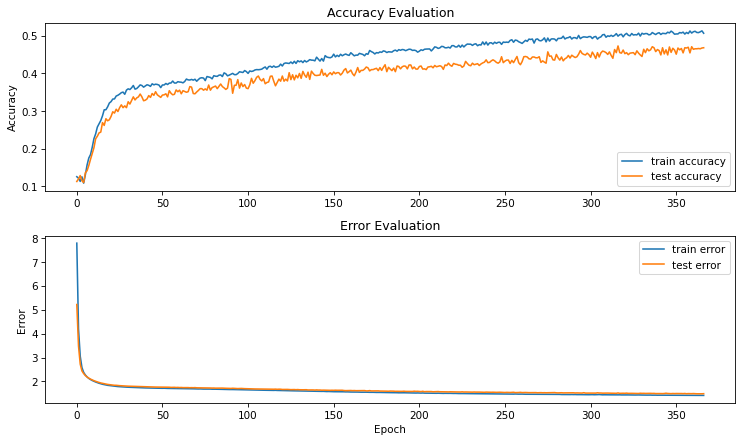


 Plots for Model  2


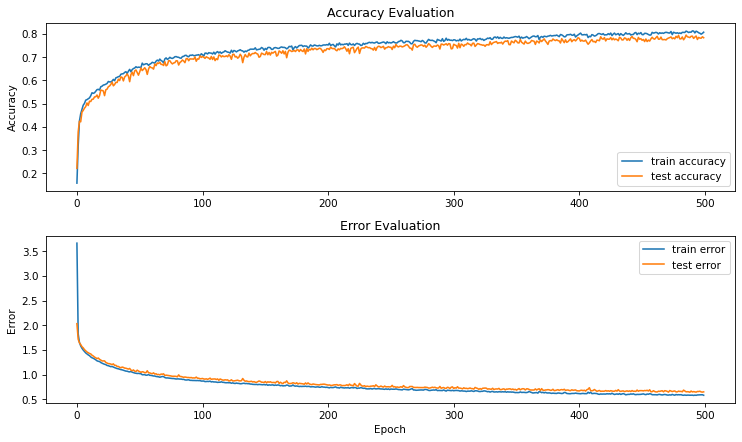


 Plots for Model  3


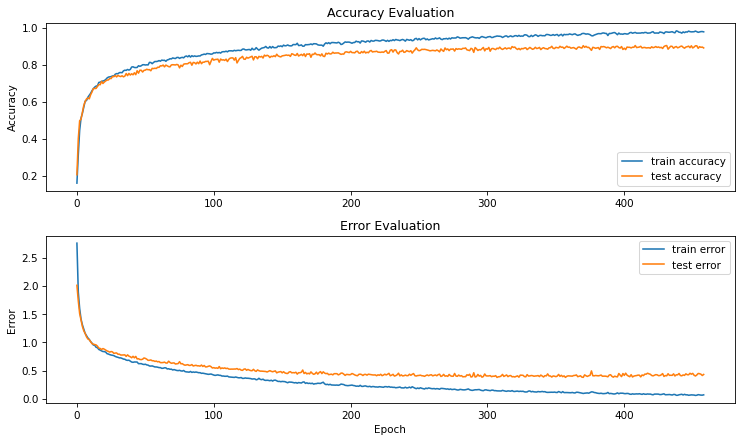


 Plots for Model  4


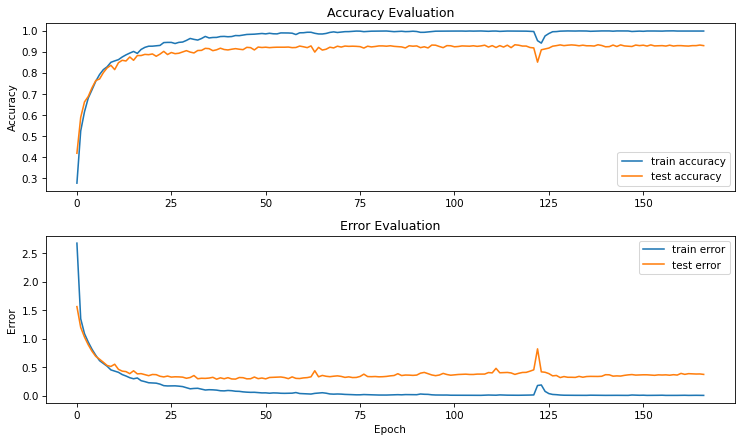

In [11]:
model.plot_all_histories()

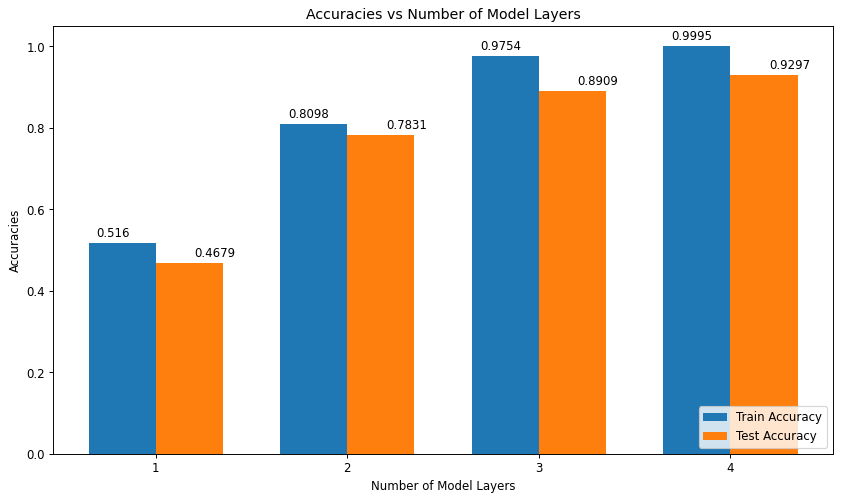

In [12]:
model.accuracies_vs_models()

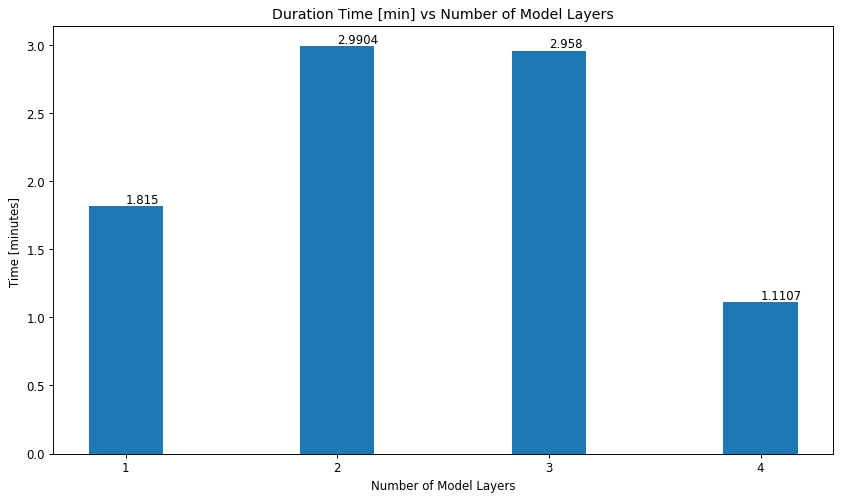

In [13]:
model.duration_vs_models()